### Plots the power spectrum of colored noise, to check whether the function for generating colored noise is correct

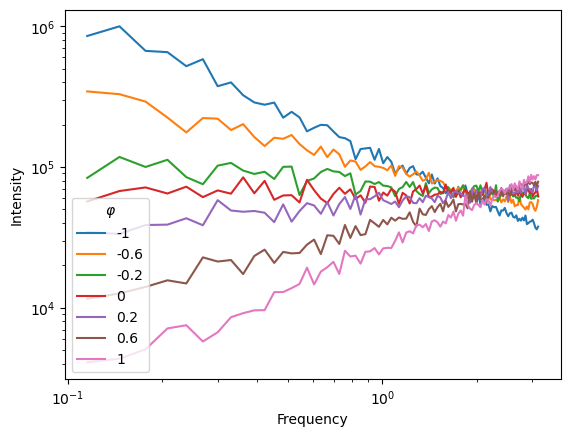

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import sys
sys.path.append('../')
from utils import get_colored_noise, get_colored_noise_2d, power_spectrum_iso, plot_power_spectrum

a = (1,1,256,256) #shape of image BxCxHxW
batch_dim = True

#bin of frequencies
bins = np.linspace(0.1, np.pi, 100)
bins_centers = (bins[1:] + bins[:-1]) / 2
varphi_range = [-1, -0.6, -0.2, 0, 0.2, 0.6, 1] #np.linspace(-1,1,6)

for _phi in varphi_range:
    s = get_colored_noise_2d(a, _phi)
    _, ps, _ = power_spectrum_iso(s[0,0,:,:].cpu().numpy(), bins=bins)
    plt.loglog(bins_centers, ps[:-1])

plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.legend(varphi_range, title=r'$\varphi$', loc='lower left');